In [2]:
import torch
a = torch.randn((2, 2))
b = torch.randn((2, 2))
print(a)
print(b)

def show_vec(x, desc=""):
    print(desc)
    print(x)
    print(x.shape)

tensor([[-0.4097, -0.8062],
        [-0.1122, -0.4561]])
tensor([[ 0.5845,  0.7110],
        [ 0.3239, -0.4607]])


In [3]:
show_vec(torch.cat((a, b), dim=0), "cat")

cat
tensor([[ 0.8663, -1.4449],
        [ 0.1591, -0.2266],
        [ 1.7766, -0.9983],
        [ 0.1652, -0.4325]])
torch.Size([4, 2])


In [4]:
show_vec(torch.stack((a, b), dim=0), "stack")

stack
tensor([[[ 0.8663, -1.4449],
         [ 0.1591, -0.2266]],

        [[ 1.7766, -0.9983],
         [ 0.1652, -0.4325]]])
torch.Size([2, 2, 2])


In [5]:
show_vec(torch.mean(a, dim=0), "mean")

mean
tensor([ 0.5127, -0.8358])
torch.Size([2])


In [ ]:
a = torch.tensor([[1,4,5],[3,2,6]])
print(a.max(dim=0).values)
print(a.max(dim=1).indices)

tensor([3, 4, 6])


In [3]:
import torch
a = torch.tensor([[1,2,6], [3,4,5]])
print(a.shape)
print(a.size(0))

torch.Size([2, 3])
2


In [2]:
import torch

scores = torch.tensor([[1,2,3], [4,5,6]])
attn_mask = torch.tensor([[True,False,False], [False,True,True]])
scores.masked_fill_(attn_mask, -1)
print(scores)

tensor([[-1,  2,  3],
        [ 4, -1, -1]])


In [5]:
a = torch.rand((1,2,3,4))
print(a.shape)
print(a.transpose(-1,-2).shape)

torch.Size([1, 2, 3, 4])
torch.Size([1, 2, 4, 3])


In [7]:
a = torch.rand((1,2,3,4))
b = torch.rand((1,2,3,4))
print(a.shape, b.shape)
print(torch.matmul(a, b.transpose(-1,-2)).shape)

torch.Size([1, 2, 3, 4]) torch.Size([1, 2, 3, 4])
torch.Size([1, 2, 3, 3])


In [ ]:
# 如果确定要进行批量矩阵乘法（3D张量），使用 bmm
# 如果需要更灵活的矩阵乘法操作或需要广播功能，使用 matmul
a = torch.rand((1,3,4))
b = torch.rand((1,3,4))
print(a.shape, b.shape)
print(torch.bmm(a, b.transpose(-1,-2)).shape)

torch.Size([1, 3, 4]) torch.Size([1, 3, 4])
torch.Size([1, 3, 3])


In [15]:
a = torch.rand((1,2))
print(a.squeeze(0).shape)
print(a.unsqueeze(0).shape)

torch.Size([2])
torch.Size([1, 1, 2])


In [19]:
a = torch.rand((1,2))
print(a.repeat(1, 2, 1, 1).shape)

torch.Size([1, 2, 1, 2])


In [20]:
a = torch.rand((1,2))
b = torch.rand((1,2))
print((a + b).shape)

torch.Size([1, 2])


In [33]:
import torch.nn as nn
a = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32)
print(a.shape)
print(a)
in_c, out_c = 2, 1
kernel_size = 1
conv = nn.Conv1d(in_channels=in_c, out_channels=out_c, kernel_size=kernel_size)
conv.weight.data = torch.ones_like(conv.weight.data)
conv.bias.data = torch.zeros_like(conv.bias.data)
conv_a = conv(a)
print(conv_a.shape)
print(conv_a)

torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([1, 3])
tensor([[5., 7., 9.]], grad_fn=<SqueezeBackward1>)


(32,)
(32,)


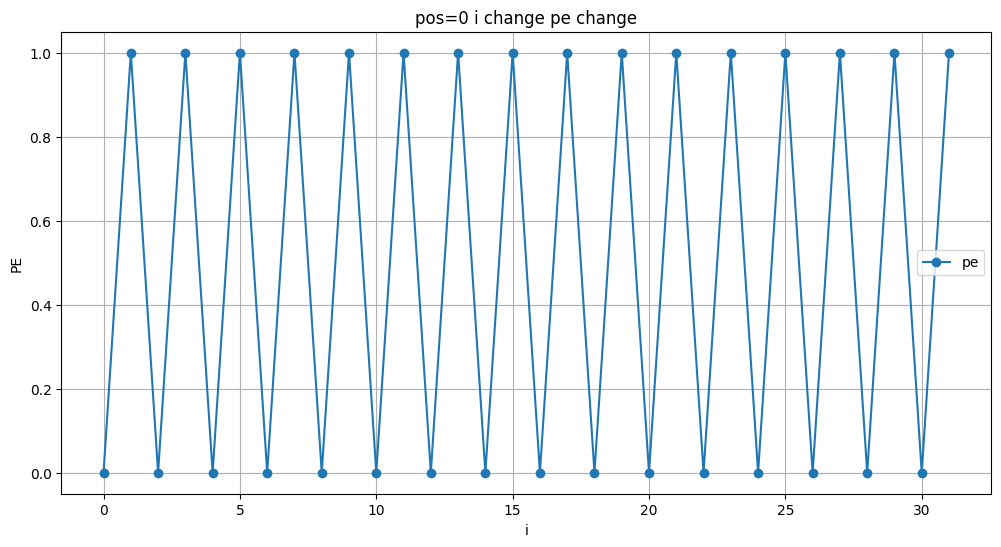

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
# pos 不变
d = 32  # 模型维度（假设）
pos_fixed = 0  # 固定位置, pos不变，i变动
i_values = np.arange(d) 

# 计算PE值
# pe_sin = np.sin(pos_fixed / (10000 ** (2 * i_values / d)))
# pe_cos = np.cos(pos_fixed / (10000 ** (2 * i_values / d)))
def calc_pe_value(i_values):
    pe = []
    idx = 0 
    for i, val in enumerate(i_values):
        val = 0
        if i % 2 == 0:
            val = np.sin(pos_fixed / (10000 ** (i / d)))
        else:
            val = np.cos(pos_fixed / (10000 ** (i / d)))
        pe.append(val)
    return np.array(pe)


final_pe = calc_pe_value(i_values)
print(i_values.shape)
print(final_pe.shape)

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(i_values, final_pe, label='pe', marker='o', linestyle='-', color='tab:blue')
# plt.plot(i_values, pe_cos, label='cos(维度2i+1)', marker='o', linestyle='-', color='tab:orange')
plt.xlabel('i')
plt.ylabel('PE')
plt.title(f'pos={pos_fixed} i change pe change')
plt.legend()
plt.grid(True)
plt.show()


(100,)
(100,)


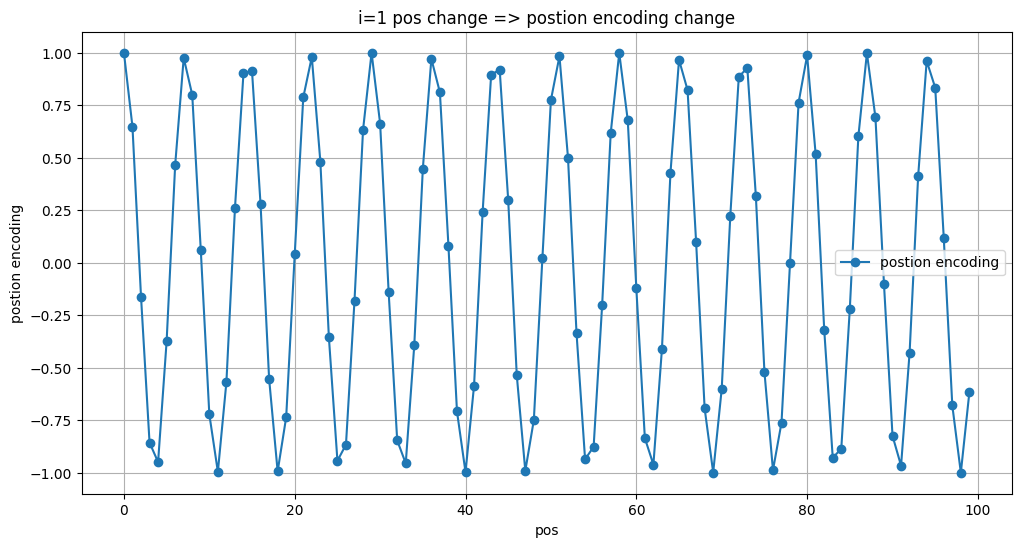

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
# i不变，pos 变
d = 64  # 模型维度（假设）
i_fixed = 1
pos_max = 100
pos_values = np.arange(pos_max)

# 计算PE值
# pe_sin = np.sin(pos_fixed / (10000 ** (2 * i_values / d)))
# pe_cos = np.cos(pos_fixed / (10000 ** (2 * i_values / d)))
def calc_pe_value(pos_max, i):
    pe = []
    idx = 0
    for pos in range(pos_max):
        val = 0
        if i % 2 == 0:
            val = np.sin(pos / (10000 ** (i / d)))
        else:
            val = np.cos(pos / (10000 ** (i / d)))
        pe.append(val)
    return np.array(pe)


final_pe = calc_pe_value(pos_max, i_fixed)
print(pos_values.shape)
print(final_pe.shape)

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(pos_values, final_pe, label='postion encoding', marker='o', linestyle='-', color='tab:blue')
# plt.plot(i_values, pe_cos, label='cos(维度2i+1)', marker='o', linestyle='-', color='tab:orange')
plt.xlabel('pos')
plt.ylabel('postion encoding')
plt.title(f'i={i_fixed} pos change => postion encoding change')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import torch
torch.tensor([[1,2], [0,1]]).eq(0).unsqueeze(1)

tensor([[[False, False]],

        [[ True, False]]])

In [40]:
import numpy as np
import torch
# a = torch.tensor([[1,2], [0,1]])
print(np.triu(np.ones((1,3,3)), k=1))


[[[0. 1. 1.]
  [0. 0. 1.]
  [0. 0. 0.]]]
